<a href="https://colab.research.google.com/github/VubohBenoit/Kaggle-competition/blob/main/videogame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the provided dataset "vgsales.csv" into a pandas DataFrame.


**Reasoning**:
Load the provided dataset "vgsales.csv" into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
display(df.head())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.



In [2]:
# Determine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Explore unique values in categorical columns
categorical_cols = ['Platform', 'Genre', 'Publisher']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print(f"\nValue counts in '{col}':")
    print(df[col].value_counts())

Shape of the DataFrame: (16598, 11)

Data types of each column:
 Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Descriptive statistics for numerical columns:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.1

## Data visualization

### Subtask:
Visualize the data distributions and categorical frequencies.


**Reasoning**:
Generate histograms for numerical features and bar charts for categorical features to visualize data distributions and frequencies. Limit the publishers in the bar chart to top 10 to avoid overcrowding.



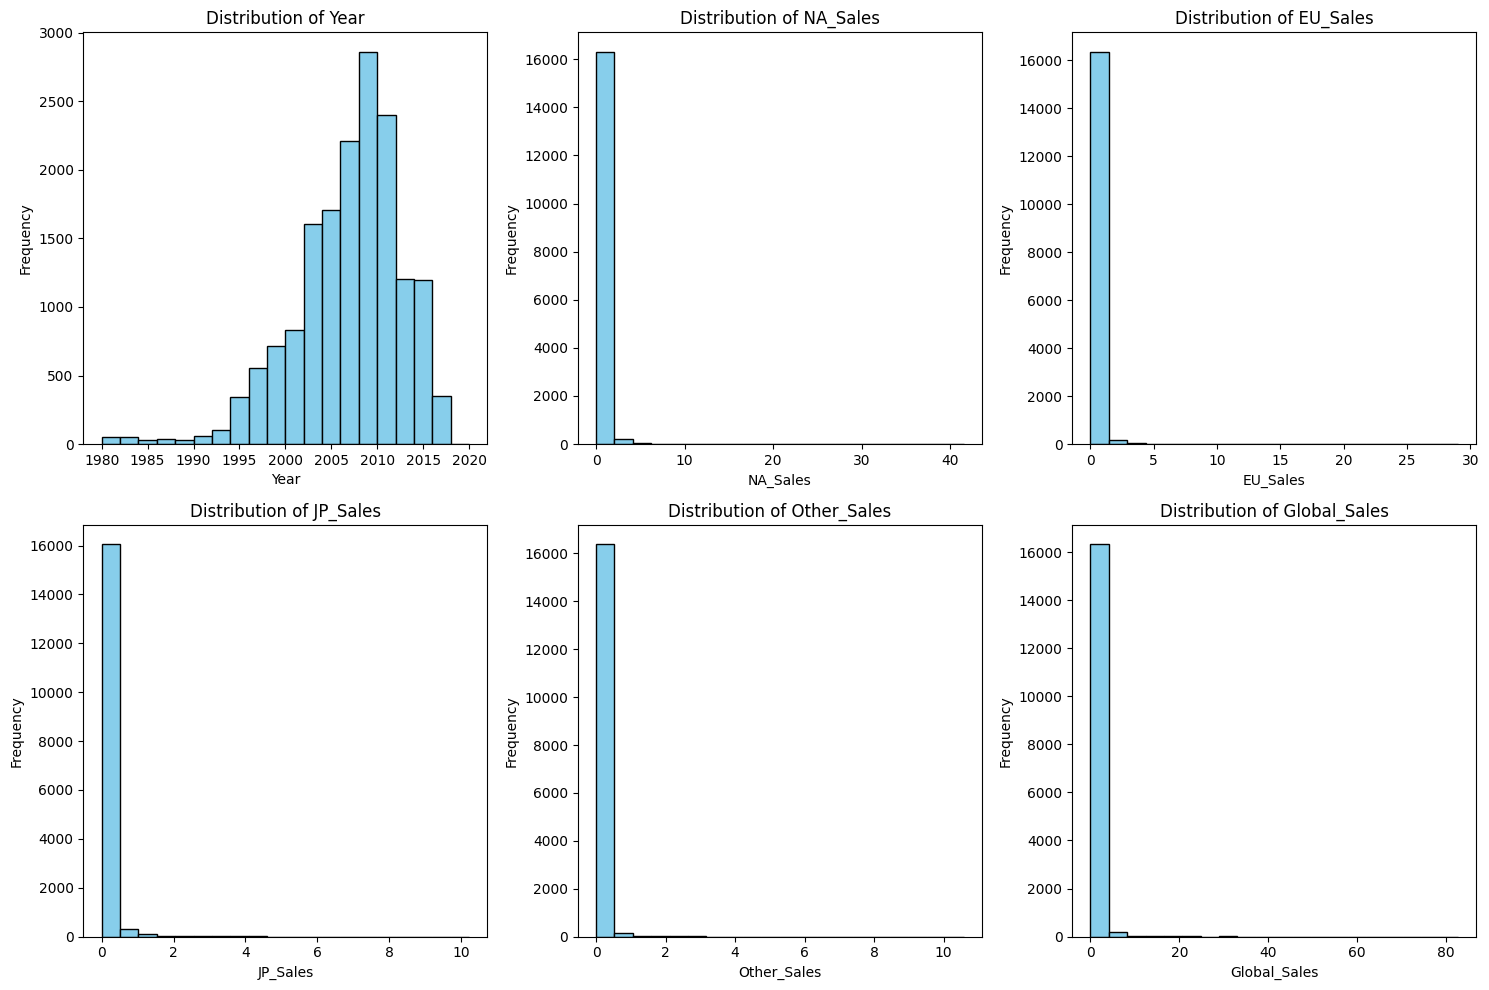

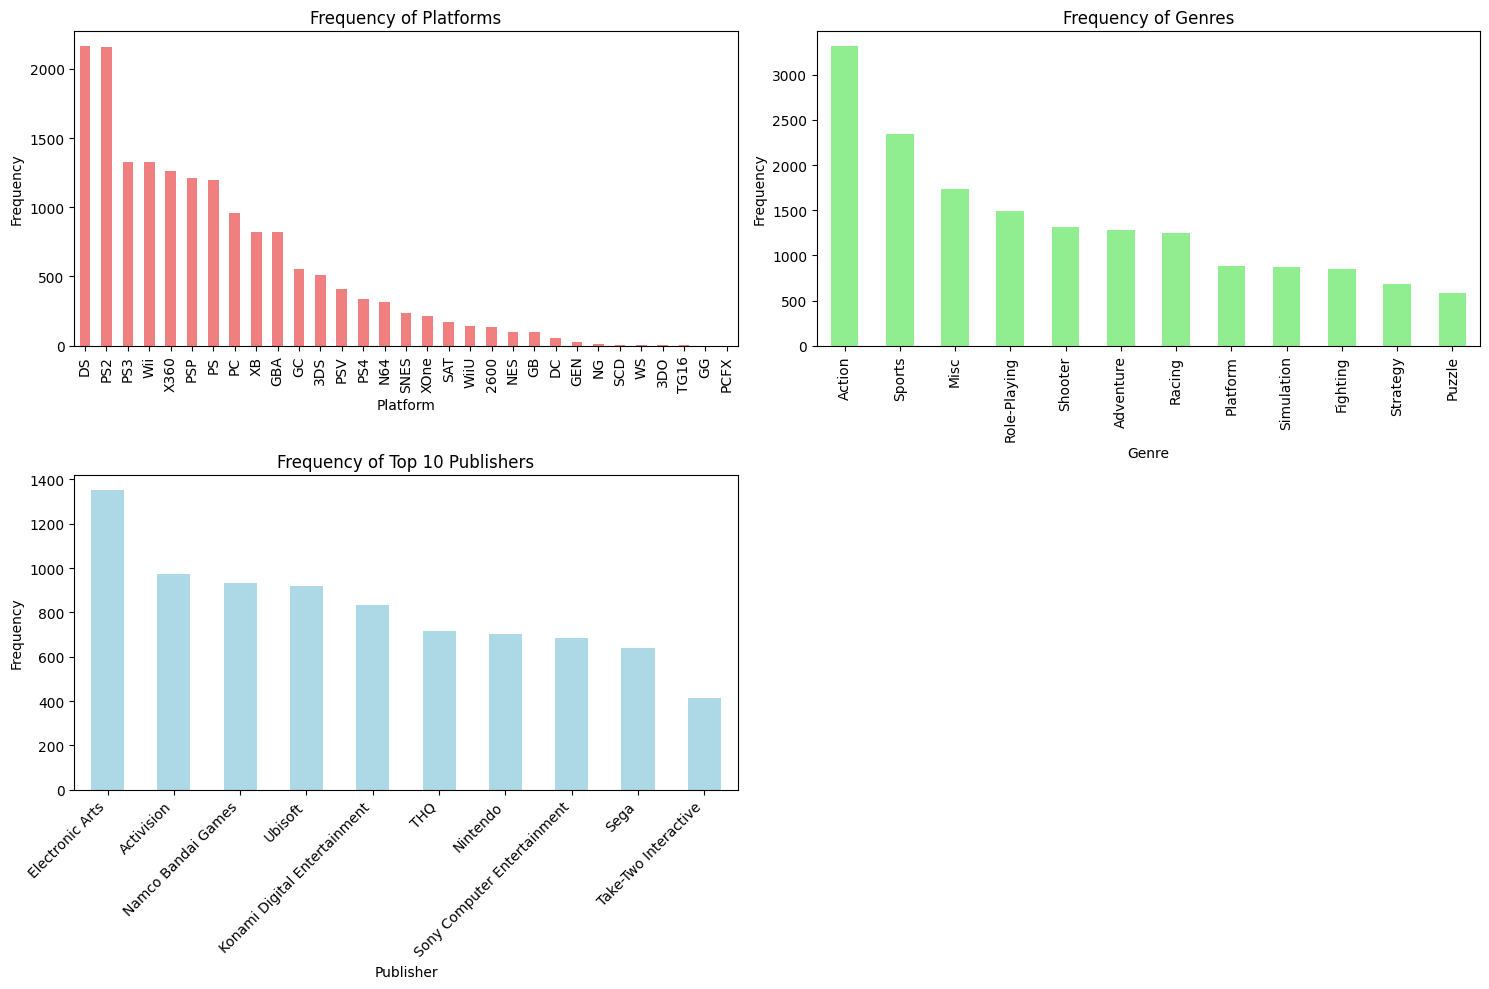

In [3]:
import matplotlib.pyplot as plt

# Histograms for numerical features
numerical_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
categorical_features = ['Platform', 'Genre', 'Publisher']
plt.figure(figsize=(15, 10))

# Platform
plt.subplot(2, 2, 1)
df['Platform'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Platforms')
plt.xlabel('Platform')
plt.ylabel('Frequency')

# Genre
plt.subplot(2, 2, 2)
df['Genre'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')


# Publisher (top 10)
plt.subplot(2, 2, 3)
top_publishers = df['Publisher'].value_counts().nlargest(10)
top_publishers.plot(kind='bar', color='lightblue')
plt.title('Frequency of Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the dataset to gain insights into sales trends and relationships between features.


**Reasoning**:
Calculate descriptive statistics for sales columns, investigate correlations between regional sales, identify top-selling games and publishers.



Descriptive Statistics for Sales Columns:
            NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean       0.264667      0.146652      0.077782      0.048063      0.537441
std        0.816683      0.505351      0.309291      0.188588      1.555028
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.470000
max       41.490000     29.020000     10.220000     10.570000     82.740000

Correlation Matrix for Sales Columns:
               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
JP_Sales      0.449787 

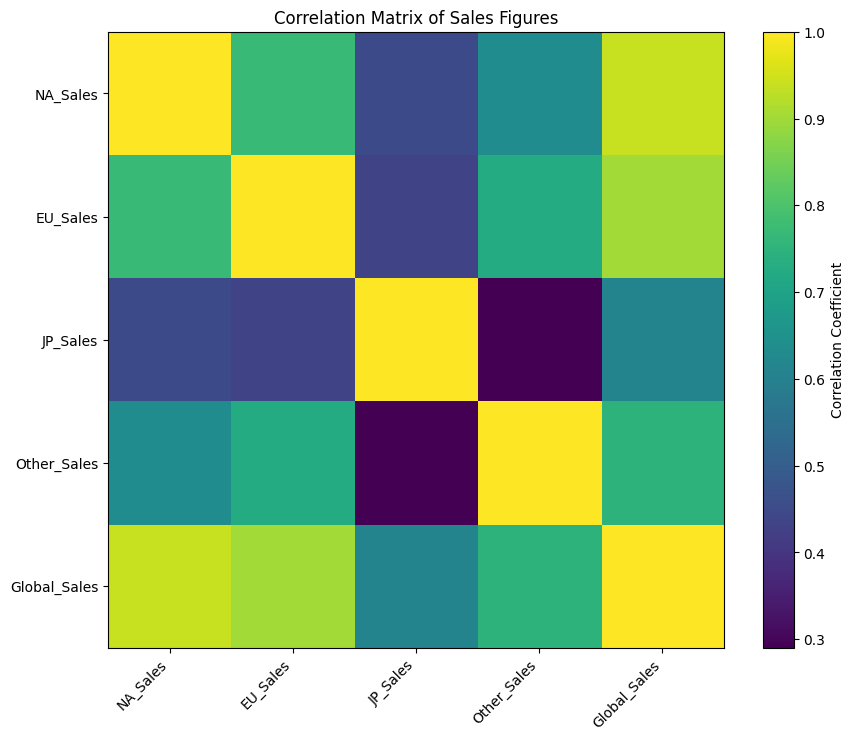


Top 10 Best-Selling Games:
                         Name Platform  Global_Sales
0                 Wii Sports      Wii         82.74
1          Super Mario Bros.      NES         40.24
2             Mario Kart Wii      Wii         35.82
3          Wii Sports Resort      Wii         33.00
4   Pokemon Red/Pokemon Blue       GB         31.37
5                     Tetris       GB         30.26
6      New Super Mario Bros.       DS         30.01
7                   Wii Play      Wii         29.02
8  New Super Mario Bros. Wii      Wii         28.62
9                  Duck Hunt      NES         28.31

Top 10 Publishers by Global Sales:
 Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                            

In [4]:
# Calculate descriptive statistics for sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_stats = df[sales_columns].describe()
print("Descriptive Statistics for Sales Columns:\n", sales_stats)

# Investigate correlation between sales figures
sales_correlation = df[sales_columns].corr()
print("\nCorrelation Matrix for Sales Columns:\n", sales_correlation)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(sales_correlation, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(sales_columns)), sales_columns, rotation=45, ha='right')
plt.yticks(range(len(sales_columns)), sales_columns)
plt.title('Correlation Matrix of Sales Figures')
plt.show()

# Identify the top 10 best-selling games
top_10_games = df.nlargest(10, 'Global_Sales')
print("\nTop 10 Best-Selling Games:\n", top_10_games[['Name', 'Platform', 'Global_Sales']])

# Determine the top 10 publishers by global sales
top_10_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
print("\nTop 10 Publishers by Global Sales:\n", top_10_publishers)

## Summary:



### 1. Data Analysis Key Findings

* **Sales Distribution Skewness:** Sales data (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) exhibits significant skewness, with a few games achieving exceptionally high sales compared to the average.
* **Regional Sales Correlation:** Strong positive correlation exists between 'NA_Sales' and 'EU_Sales', indicating similar sales trends in North America and Europe.  Correlation between 'JP_Sales' and other regions is weaker, suggesting distinct market preferences in Japan.
* **Market Dominance:** Nintendo dominates the best-selling games list (top 10 games) and is the leading publisher by a significant margin (top 10 publishers).
* **Missing Data:** The 'Year' column has 271 missing values, and the 'Publisher' column has 58 missing values. This could impact further analyses.


### 2. Insights or Next Steps

* **Investigate Japanese Market:** Further analysis should explore the factors contributing to the weaker correlation between Japanese sales and sales in other regions.  This might involve examining genre preferences or platform popularity in Japan.
* **Handle Missing Data:** Address missing values in the 'Year' and 'Publisher' columns.  Imputation or removal of rows with missing data could improve the accuracy of future analyses.
